# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, we explored an used cars dataset from kaggle. This is a subset from the original dataset that contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Our goal is to understand what factors make a car more or less expensive.  And also provide clear recommendations to the Used Car Dealership owners as to what consumers value in a used car.

### Goal: 

To understand what factors make a car more or less expensive and provide clear recommendations to your client (an used car dealership) as to what consumers value in a used car.
    

The dataset provides data about various features of the cars like number of cylinders in the car, model of the car, manufacturer, drive type (forward drive/rearward dive/all wheel drive),number of miles the car drove etc.
By exploring the data, we need to determine,
1. How each feature is correlated to the price and if they negatively or positively impact the pricing of the car?
2. If we have limited data, like data only for few features, how the price will be impacted?
3. Are there any features that help us determine if we can price the car lower or higher?

This information should help the car dealer to understand what features the consumers are looking for in a car when they want to buy an used car


### Data Understanding


- Read the csv file
- Performed Feature Analysis by understanding the features that may impact the price. Gathered the below points from various sources in internet

    - Region, state - Supply and demand for certain vehicle types varies geographically, which is why used car prices vary across cities and states,” said iSeeCars Executive Analyst Karl Brauer. “States with temperate climates tend to have more lower-priced sedans, while mountainous and harsh climate areas prefer trucks and SUVs.

    - VIN - By entering your License Plate or VIN, you'll get a more accurate appraisal that may raise your car's value.

    - Transmission - A vehicle with a bad transmission has the additional option of “being repaired.” However, as stated before, transmission repairs can be costly. While the option to sell or trade-in your car is on the table, keep in mind that its value is negatively impacted by a bad transmission

    - Cylinder - Generally, the more cylinders your engine has, the more power is produced. Most cars have a 4, 6, or 8 cylinder engine. 

    - Odometer - Cars with more miles on the odometer are generally worth less, so you'll be able to get them cheaper. Opposingly, cars with fewer miles on the odometer usually hold a higher value, barring any major mechanical or electrical failures, which will make them slightly more expensive.

- Also, identified that almost all types of used cars are available in different regions/states. 

- Imported the different libraries in Python to get started with the exploratory data analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
cars = pd.read_csv("C:/Users/jpatchigolla/Downloads/practical_application_II_starter/data/vehicles.csv")

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
cars.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
cars.shape

(426880, 18)

#### Exploratory Data Analysis
1. Looked at the datapoints in the dataset
2. Dataset has used cars from sale from almost 100 years back. Assuming there are very few people who buy cars more than 50 years old, I dropped the rows from the dataset that have cars manufacturing year less than 1970. This resulted in dropping of 5283 rows
3. Dropped the column Id as it doesn't influence price in any way.
4. Dropped the columns manufacturer, region and state as irrespective of these, our goal is to determine what customers would value in a used car. 
5. Dropped the Size column as 75% of the data in the column is missing.
6. Dropping model as there is a type column

    

In [8]:
cars_data = cars.query("year >=1970")
cars_data.shape

(420393, 18)

In [10]:
cars_data.drop(columns = ['id', 'region', 'paint_color', 'model', 'size', 'manufacturer','state'], inplace= True)
cars_data.shape

C:\Users\jpatchigolla\AppData\Local\Temp\ipykernel_24172\1370601929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data.drop(columns = ['id', 'region', 'paint_color', 'model', 'size', 'manufacturer','state'], inplace= True)


(420393, 11)

 ### Data Cleansing

**VIN**

Presence/absence of VIN is what is required to appraise the car correctly. Hence converted the VIN into a numeric column by assigning 1 for all the rows where VIN is present and assigned 0 where VIN is missing. Converted the column into integer column using pd.to_numeric() funciton.

In [11]:
cars_data['VIN'].fillna(0, inplace=True)
cars_data.loc[cars_data["VIN"] != 0, "VIN"] = 1
cars_data['VIN']=pd.to_numeric(cars_data['VIN'])
cars_data['VIN'].value_counts()

C:\Users\jpatchigolla\AppData\Local\Temp\ipykernel_24172\833551647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['VIN'].fillna(0, inplace=True)
C:\Users\jpatchigolla\AppData\Local\Temp\ipykernel_24172\833551647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['VIN']=pd.to_numeric(cars_data['VIN'])


1    264036
0    156357
Name: VIN, dtype: int64

#### Cylinders

Removed the string value " cylinders" in cylinders column values. Converted the data into integers. Calculated the mean value of the column and it's 6. So, assigned 6 to the missing and 'other' cylinder data. Converted this column also into numeric


In [12]:
cars_data['cylinders'] = cars_data.query("cylinders != ''")['cylinders'].str.replace(' cylinders', '')
cars_data['cylinders'].value_counts()

C:\Users\jpatchigolla\AppData\Local\Temp\ipykernel_24172\518503889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['cylinders'] = cars_data.query("cylinders != ''")['cylinders'].str.replace(' cylinders', '')


6        93069
4        76903
8        69469
5         1711
10        1447
other     1226
3          644
12         207
Name: cylinders, dtype: int64

In [13]:
cars_data.loc[cars_data["cylinders"] =='other', "cylinders"] = '6'
cars_data.loc[cars_data["cylinders"].isnull(), "cylinders"] = '6'
cars_data['cylinders'].value_counts()
cars_data['cylinders']=cars_data['cylinders'].astype(int)

C:\Users\jpatchigolla\AppData\Local\Temp\ipykernel_24172\3018718834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['cylinders']=cars_data['cylinders'].astype(int)


#### Drive 

"drive" column has values for forward drive differently spelled. Some have 'fwd' and some have '4wd'. Replaced '4wd' with 'fwd'. For all the missing values, randomly assigned one of the 'fwd' or 'rwd'.

In [14]:
cars_data.loc[cars_data["drive"] =='4wd', "drive"] = 'fwd'
cars_data['drive'].value_counts()


fwd    236320
rwd     56023
Name: drive, dtype: int64

In [15]:
cars_data.loc[cars_data["drive"].isnull(), "drive"] = np.random.choice(['fwd','rwd'], cars_data['drive'].isna().sum())
cars_data['drive'].value_counts()

fwd    300358
rwd    120035
Name: drive, dtype: int64

#### Missing values in "odometer" column are assigned the mean value of the data in that column.
#### Missing values in "transmission", "fuel" and "title_status" columns are assinged randomly one of the categorical values they have

In [16]:
cars_data.loc[cars_data["odometer"].isnull(), "odometer"] = cars_data['odometer'].mean()
cars_data.loc[cars_data['transmission'].isna(),'transmission']= np.random.choice(['automatic','manual','other'], cars_data['transmission'].isna().sum())
cars_data.loc[cars_data['fuel'].isna(),'fuel']= np.random.choice(['gas','diesel','other','hybrid','electric'], cars_data['fuel'].isna().sum())
cars_data.loc[cars_data['title_status'].isna(),'title_status']= np.random.choice(['clean','rebuilt','salvage','lien','missing','parts only'], cars_data['title_status'].isna().sum())

#### Dropped the rows having missing values in 'condition' and 'type' columns

In [18]:
cars_data.dropna(subset=['condition','type'], inplace=True)

C:\Users\jpatchigolla\AppData\Local\Temp\ipykernel_24172\794161282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data.dropna(subset=['condition','type'], inplace=True)


In [19]:
cars_data.shape

(217393, 11)

In [20]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217393 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         217393 non-null  int64  
 1   year          217393 non-null  float64
 2   condition     217393 non-null  object 
 3   cylinders     217393 non-null  int32  
 4   fuel          217393 non-null  object 
 5   odometer      217393 non-null  float64
 6   title_status  217393 non-null  object 
 7   transmission  217393 non-null  object 
 8   VIN           217393 non-null  int64  
 9   drive         217393 non-null  object 
 10  type          217393 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 19.1+ MB




#### Transform the Data



Converted all the categorical columns into numeric columns by getting dummies using pd.get_dummies() function and concating the resulting columns with the main dataframe

In [25]:
dummies = pd.get_dummies(cars_data[['title_status', 'transmission','drive', 'type', 'condition', 'fuel']])
dummies.head()

,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_fwd,...,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
28,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
29,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
30,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
31,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
cars_data_dummies = pd.concat([cars_data,dummies], axis=1).drop(columns = ['title_status', 'transmission','drive', 'type', 'condition', 'fuel'])
cars_data_dummies.head(10)

,price,year,cylinders,odometer,VIN,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,...,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,33590,2014.0,8,57923.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
28,22590,2010.0,8,71229.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
29,39590,2020.0,8,19160.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
30,30990,2017.0,8,41124.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31,15000,2013.0,6,128000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32,27990,2012.0,8,68696.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
33,34590,2016.0,6,29499.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
34,35000,2019.0,6,43000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35,29990,2016.0,6,17302.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
36,38590,2011.0,8,30237.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


Run the correlation function and observe correlations between different columns with price. As per the correlation matrix, it's observed that all the features are very sparsely correlated to the price. So, it indicates the price determination is based on multiple features and not few.

In [27]:
cars_data_dummies.corr()

,price,year,cylinders,odometer,VIN,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,...,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
price,1.000000,-0.002019,0.004839,0.001125,-0.003452,0.000835,-0.000289,-0.000284,-0.000247,-0.000501,...,-0.000252,-0.001227,-0.000057,-0.000134,-0.000209,0.002756,-0.000145,-0.000928,-0.000401,-0.000647
year,-0.002019,1.000000,-0.103845,-0.223158,0.437080,-0.004821,0.019730,-0.024127,0.005019,0.018169,...,-0.235651,0.165995,0.013356,0.028817,-0.051230,-0.075635,0.039765,-0.146340,0.031959,0.216116
cylinders,0.004839,-0.103845,1.000000,0.010819,0.048857,0.086675,-0.012397,-0.018922,-0.016378,-0.072535,...,0.016530,0.120995,-0.045136,-0.005159,-0.010384,0.134106,-0.007528,-0.079901,-0.078785,0.035610
odometer,0.001125,-0.223158,0.010819,1.000000,-0.168226,-0.004680,-0.001403,0.005096,0.006703,-0.005790,...,0.095850,-0.088411,0.005035,-0.013550,0.029229,0.075053,-0.021290,0.039538,-0.004725,-0.097128
VIN,-0.003452,0.437080,0.048857,-0.168226,1.000000,0.064828,-0.020518,0.023369,0.039554,-0.079643,...,-0.165083,0.261125,-0.195139,-0.034644,-0.048576,-0.048501,0.029541,-0.165770,0.013712,0.230390
title_status_clean,0.000835,-0.004821,0.086675,-0.004680,0.064828,1.000000,-0.396068,-0.303195,-0.281177,-0.639552,...,-0.017931,0.153673,-0.010335,-0.003677,-0.104522,-0.002669,0.009787,-0.062614,-0.000750,0.078323
title_status_lien,-0.000289,0.019730,-0.012397,-0.001403,-0.020518,-0.396068,1.000000,-0.007069,-0.006555,-0.014910,...,-0.003240,-0.065683,0.013405,0.010241,-0.000873,0.014709,0.005526,0.015517,-0.000376,-0.031285
title_status_missing,-0.000284,-0.024127,-0.018922,0.005096,0.023369,-0.303195,-0.007069,1.000000,-0.005018,-0.011414,...,0.025608,-0.058973,-0.020086,-0.004445,0.028513,-0.000655,-0.004320,0.018903,0.002982,-0.023351
title_status_parts only,-0.000247,0.005019,-0.016378,0.006703,0.039554,-0.281177,-0.006555,-0.005018,1.000000,-0.010585,...,-0.003540,-0.063442,-0.018519,-0.001872,0.029651,-0.000400,-0.004834,0.018364,-0.000076,-0.021528
title_status_rebuilt,-0.000501,0.018169,-0.072535,-0.005790,-0.079643,-0.639552,-0.014910,-0.011414,-0.010585,1.000000,...,-0.002768,-0.090880,0.027753,0.001716,0.004364,-0.001700,-0.008841,0.043320,-0.001479,-0.050328


#### Created a pipeline with FeatureUnion function to create PolynomialFeatures for numeric columns and concatenate them with the dummies columns data.

In [30]:

class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_cols = X[self.columns]
        return X_cols

# Using pandas get dummies to make pipeline a bit simpler by
# avoiding one-hot and label encoder.     
# Build the pipeline from a FeatureUnion that processes 
# numerical and one-hot encoded separately.
# FeatureUnion puts them back together when it's done.
pipe2nvars = Pipeline([
    ('features', FeatureUnion([('num', Pipeline([('extract', ColumnExtractor(columns=['year','cylinders','odometer','VIN'])),
                                          ('poly', PolynomialFeatures()),
                                          ])),
                               ('cat_var', ColumnExtractor(columns= dummies.columns.values.tolist()))])
    )])    

pipe2nvars

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('extract',
                                                                  ColumnExtractor(columns=['year',
                                                                                           'cylinders',
                                                                                           'odometer',
                                                                                           'VIN'])),
                                                                 ('poly',
                                                                  PolynomialFeatures())])),
                                                ('cat_var',
                                                 ColumnExtractor(columns=['title_status_clean',
                                                                          'title_status_lien',
                                                                          'title_status_missing',
                                                                          'title_status_parts '
                                                                          'only',
                                                                          'title_status_rebuilt',
                                                                          'title_sta...
                                                                          'transmission_manual',
                                                                          'transmission_other',
                                                                          'drive_fwd',
                                                                          'drive_rwd',
                                                                          'type_SUV',
                                                                          'type_bus',
                                                                          'type_convertible',
                                                                          'type_coupe',
                                                                          'type_hatchback',
                                                                          'type_mini-van',
                                                                          'type_offroad',
                                                                          'type_other',
                                                                          'type_pickup',
                                                                          'type_sedan',
                                                                          'type_truck',
                                                                          'type_van',
                                                                          'type_wagon',
                                                                          'condition_excellent',
                                                                          'condition_fair',
                                                                          'condition_good',
                                                                          'condition_like '
                                                                          'new',
                                                                          'condition_new',
                                                                          'condition_salvage', ...]))]))])

### MODELING

Now the pipeline is ready to create the final dataset, decided to apply below unsupervised learning models on the data to derive needed inferences.

Unsupervised Learning
- Linear Regression 
        - All the features
        - Sequential Feature Selection
 - Ridge Reularization (Grid search for hyper parameter)
        

Before applying a model, split the dataset into train and development(test) datasets.

Calculated mean_squared_errors for each hyperparameter and compared to determine the best model for the dataset

Plotted the coefficients against the hyperparameter values and observer which features have high/low weightage and also positive/negative weightage in determining the price of the used car.

In [33]:
# Linear Regression on dataset with Polynomial Features for degrees 1,2,3,4

y = cars_data['price']

mses_train=[]
mses_test = []
coef = []
degrees = [1,2,3,4]
for p in range(1, 5):
    pipe2nvars.set_params(features__num__poly__degree=p)
    res = pipe2nvars.fit_transform(pd.get_dummies(cars_data))
    print('polynomial degree: {}; shape: {}'.format(p, res.shape))

    X = pd.DataFrame(res)#, columns = pipe2nvars.named_steps['poly'].get_feature_names_out())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    linreg = LinearRegression(fit_intercept = False)
    linreg.fit(X_train,y_train)
    mse_train = mean_squared_error(linreg.predict(X_train), y_train)
    mse_test = mean_squared_error(linreg.predict(X_test), y_test)
    mses_train.append(mse_train)
    mses_test.append(mse_test)
    coef.append(linreg.coef_)
    

print("Train MSEs: ", mses_train)
print("Test MSEs: ", mses_test)





polynomial degree: 1; shape: (217393, 40)
polynomial degree: 2; shape: (217393, 50)
polynomial degree: 3; shape: (217393, 70)
polynomial degree: 4; shape: (217393, 105)
Train MSEs:  [104776617480808.67, 104986703962074.77, 104779748702913.72, 104783228983206.36]
Test MSEs:  [238784716554.31058, 474318258526.46466, 239522331280.9014, 232420927948.23767]


In [34]:
error_df = pd.DataFrame(list(zip(degrees, mses_train, mses_test)), columns=['Degree','Train_MSE','Test_MSE'])
error_df

,Degree,Train_MSE,Test_MSE
0,1,1.047766e+14,2.387847e+11
1,2,1.049867e+14,4.743183e+11
2,3,1.047797e+14,2.395223e+11
3,4,1.047832e+14,2.324209e+11


In [35]:
best_degree = error_df.sort_values("Test_MSE").iloc[0,:]
best_degree

Degree       4.000000e+00
Train_MSE    1.047832e+14
Test_MSE     2.324209e+11
Name: 3, dtype: float64

From the above observation, when the model is applied on PolynomialFeatures for degree 4, the mean squared error on the development data set is the lowest. But the processing time is quite high because of 105 features under consideration.

So, now set to explore the dataset by selecting 5 or 7 features using SequientialSelector() function and applying Linear Regression on them.

In [38]:
cars_data_dummies.head()

,price,year,cylinders,odometer,VIN,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,...,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
27,33590,2014.0,8,57923.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
28,22590,2010.0,8,71229.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
29,39590,2020.0,8,19160.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
30,30990,2017.0,8,41124.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31,15000,2013.0,6,128000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Linear Regression with Sequential Feature selection (# 5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5)
best_features = selector.fit_transform(X_train, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('column_selector', selector),
    ('linreg', LinearRegression())])
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
linreg_feature_select_coef = pipe.named_steps['linreg'].coef_

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

Train MSE:  104792879965223.89
Test MSE:  222297198453.25


Pipeline(steps=[('scaler', StandardScaler()),
                ('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('linreg', LinearRegression())])

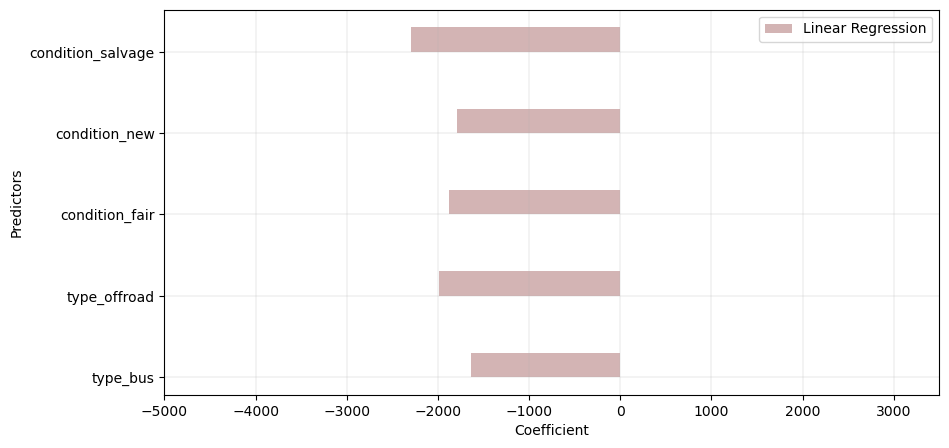

In [46]:
plt.rcdefaults()

plt.figure(figsize=(10,5))

plt.barh(best_features_df.columns.to_list(),linreg_feature_select_coef,0.3 ,align='edge',color="#D3B4B4", label="Linear Regression")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.title
plt.xlim(-5000,3500)
plt.show()

In [47]:
#Linear Regression with Sequential Feature selection (# 7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=7)
best_features = selector.fit_transform(X_train, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('column_selector', selector),
    ('linreg', LinearRegression())])
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
linreg_coefs = pipe.named_steps['linreg'].coef_
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

Train MSE:  104792867968355.81
Test MSE:  222307911211.17


Pipeline(steps=[('scaler', StandardScaler()),
                ('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7)),
                ('linreg', LinearRegression())])

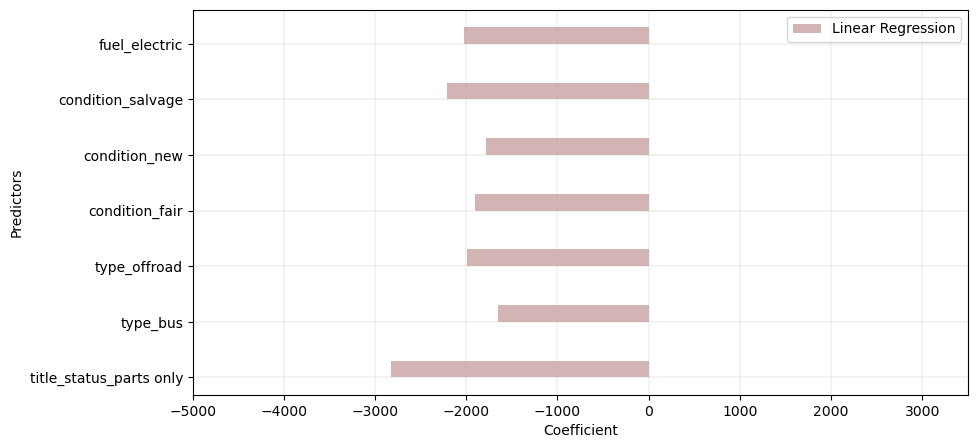

In [49]:
plt.rcdefaults()

plt.figure(figsize=(10,5))

plt.barh(best_features_df.columns.to_list(),linreg_coefs,0.3 ,align='edge',color="#D3B4B4", label="Linear Regression")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.title
plt.xlim(-5000,3500)
plt.show()

#### As we know using Sequential Feature selection allows us to predict the price, but we will not be able to derive inferences as our model is applied on very limited features.
#### So, Now applied the Ridge Regularization model on the entire dataset and calculated mean_squared_error for various values of alpha hyperparameter

In [51]:
# Ridge Regression

y = cars_data_dummies['price']
X = cars_data_dummies.drop(columns = 'price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

ridge_mse_train_list = []
ridge_mse_test_list = []
inv_alphas = []
coefs = []
alphas = 10**np.linspace(-5,4,15)
for alpha in alphas:
    inv_alphas.append(1/alpha)  
    ridge_reg = Ridge(alpha = alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_mse_train = mean_squared_error(ridge_reg.predict(X_train),y_train)
    ridge_mse_test = mean_squared_error(ridge_reg.predict(X_test),y_test)
    ridge_mse_train_list.append(ridge_mse_train)
    ridge_mse_test_list.append(ridge_mse_test)
    coefs.append(ridge_reg.coef_)
    
error_df = pd.DataFrame(list(zip(alphas, ridge_mse_train_list, ridge_mse_test_list)), columns=['Alpha','Train_MSE','Test_MSE'])
#Rescaling all the errors so that they become Z-scores, so interpreting these errors is a bit non-trivial

scale = StandardScaler()
erro_df = pd.DataFrame(scale.fit_transform(error_df), columns = scale.get_feature_names_out())
error_df['Train_MSE'] = error_df['Train_MSE']/1000000000000
error_df['Test_MSE'] = error_df['Test_MSE']/1000000000000
error_df


C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.90605e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.37517e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.68003e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jpatchigolla\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.617e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=Tr

,Alpha,Train_MSE,Test_MSE
0,0.000010,104.776617,0.238783
1,0.000044,104.776617,0.238783
2,0.000193,104.776617,0.238783
3,0.000848,104.776617,0.238783
4,0.003728,104.776617,0.238783
5,0.016379,104.776617,0.238783
6,0.071969,104.776617,0.238783
7,0.316228,104.776617,0.238783
8,1.389495,104.776617,0.238780
9,6.105402,104.776618,0.238770


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


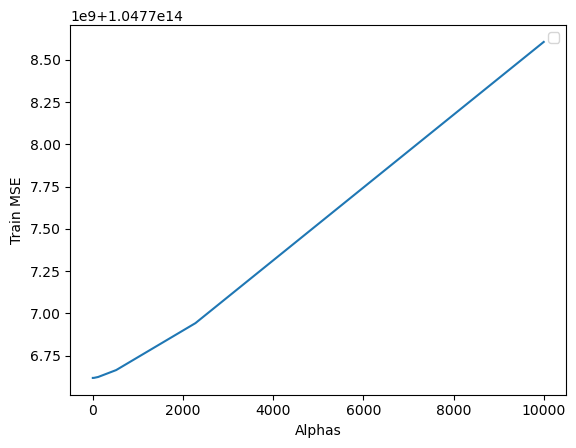

In [52]:
plt.plot(alphas,ridge_mse_train_list,'-' )
plt.xlabel("Alphas")
plt.ylabel("Train MSE")
plt.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


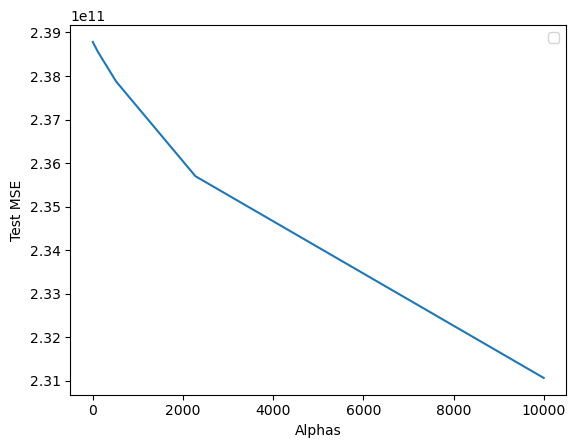

In [53]:
plt.plot(alphas,ridge_mse_test_list,'-' )
plt.xlabel("Alphas")
plt.ylabel("Test MSE")
plt.legend(loc='best')

Above shows that for alpha value of 10000, the mean squared error on the development data set is the lowest.

#### Now used the GridSearchCV to determine the best alpha value for the dataset

In [54]:
# Ridge Regression with GridSearch CV

ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
parameters_to_try = {'ridge__alpha': 10**np.linspace(-5,4,100)}

model_finder = GridSearchCV(estimator = ridge_pipe, param_grid = parameters_to_try,scoring='neg_mean_squared_error')
model_finder.fit(X_train,y_train)
best_model = model_finder.best_estimator_
print("Best Model ", best_model)


Best Model  Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=10000.0))])


In [55]:
coefs = best_model.named_steps['ridge'].coef_
ridge_train_preds = best_model.predict(X_train)
ridge_test_preds = best_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

features = X_train.columns.values.tolist()
column_coefs = pd.DataFrame(list(zip(features, coefs)), columns=['Feature','Coefficient'])
print(f'Ridge Train MSE: {ridge_train_mse: .2f}')
print(f'Ridge Test MSE: {ridge_test_mse: .2f}')

print("\nFeature Coefficients for the best model\n")

column_coefs

Ridge Train MSE:  104776688984552.52
Ridge Test MSE:  236838978361.93

Feature Coefficients for the best model



,Feature,Coefficient
0,year,-7547.542306
1,cylinders,47029.774746
2,odometer,6480.564887
3,VIN,-49117.229310
4,title_status_clean,3348.069877
5,title_status_lien,-2219.659930
6,title_status_missing,758.985377
7,title_status_parts only,1361.829639
8,title_status_rebuilt,-3563.394921
9,title_status_salvage,-1476.662705


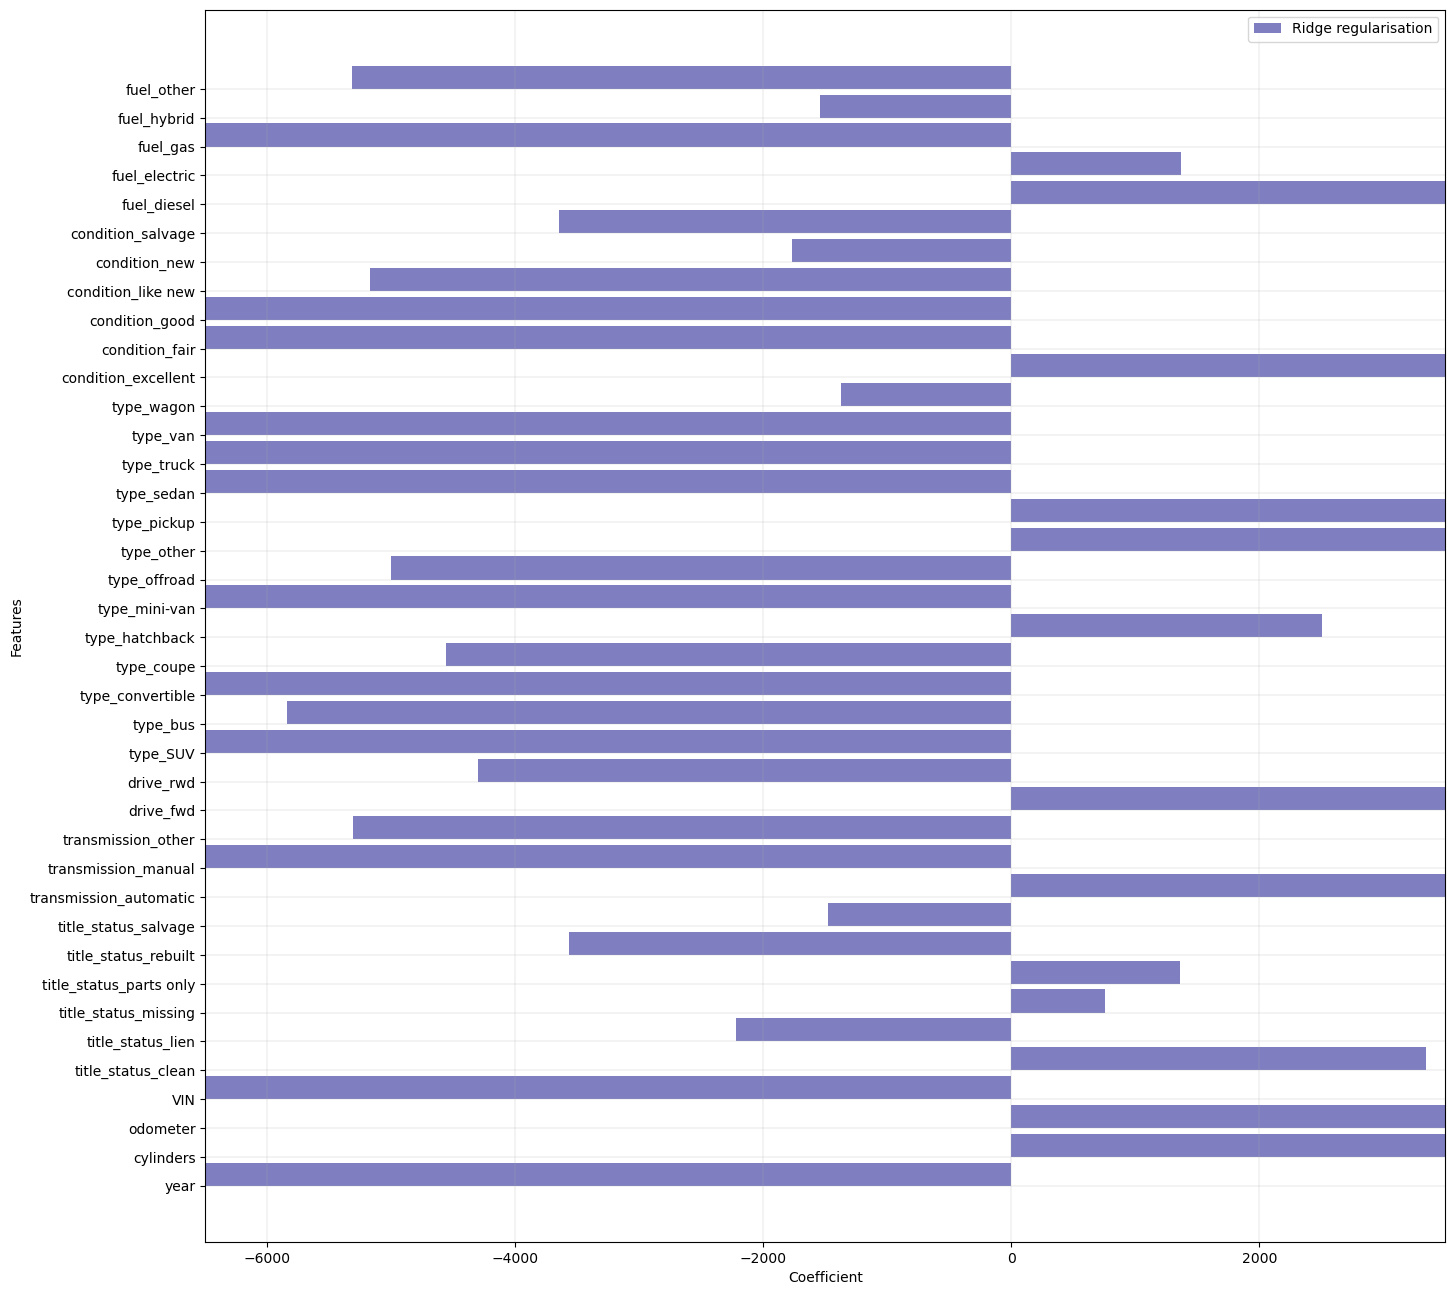

In [56]:
plt.rcdefaults()

plt.figure(figsize=(16,16))
plt.barh(features,coefs,0.8 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.legend(loc='best')
plt.title
plt.xlim(-6500,3500)
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### MY POINTS

After executing different Linear and Ridge regression models on our Cars dataset, and calculating mean squared errors on Training and Development sets, tabulated the below table to help compare and identify the models that are best fit for our cars dataset.

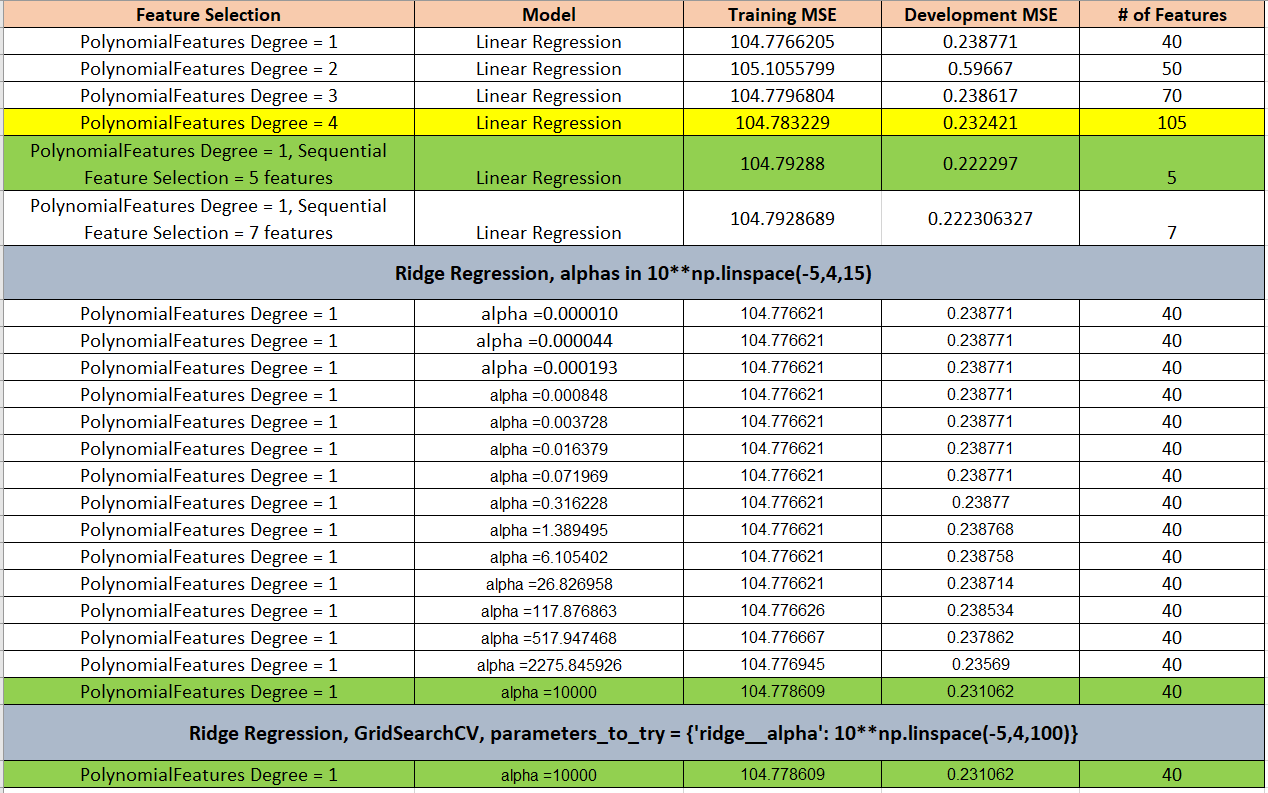

This table clearly shows the Linear Regression has the lowest mean squared error on the development set when we use SequentialFeature selector and selected 5 features. These 5 features are Car type - Bus, offroad and Car Condition - Fair/New/Salvage

When we select 7 features, the mean squared error is a bit high and the two new features added are title_status_parts only and fuel_electric

So, overall, the model sees that Car Type, Condition, Title Status and Fuel (Electric/gas/..) as the primary influencing factors of the price. 

Also, the Ridge Regression with alpha = 10000 has the lowest mean squared error on the development set predictions.

Next Steps: We were able to explore, analyze and apply model only on subset of features. Dataset has many missing values.
Less than 10% of the given data has all the information. Data is missing for one feature or the other in 90% of the data set.
Especially some important columns. One of them is Size. The size can be a very big factor in determining the price of the car. But as 75% of datapoints has Size data missing, we had to drop that column. 

As mentioned in the above Exploratory Data Analysis section, we were able to fill in few missing values with mean values, random categorical values etc. and thus were able to utilize 50% of the dataset for analysis. 

So, as next steps, we should go back and collect the data that's missing and re-run our analysis to determine effectively the factors customers would like to look at while purchasing an used car. With good dataset we should be able to predict precisely the price of an used car.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Findings Report

From the Linear Regression model performed after selecting the best 5 features that influence the pricing of the used car, the below plot is drawn. This clearly shows that these 5 features have a strong negative weight. Which means the presence of these features in the car will make the car less expensive. So, customers also will avoid buying the cars with these features.

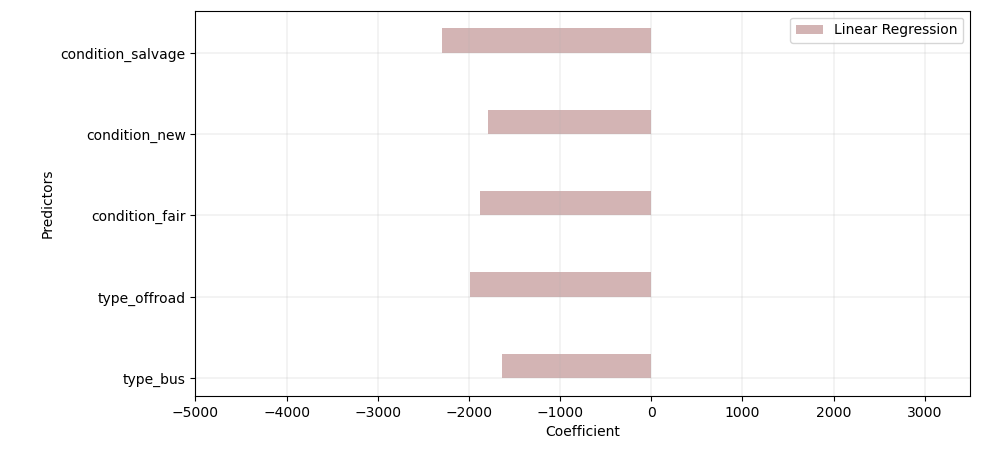






When we want to look at all the features and not just few, Ridge Regularization model helps. Below is the plot that shows the Coefficients plotted against the Features that clearly shows how each feature positively or negatively impacts the price.

From the plot, it's inferred that -

People prefer to buy Electric or Diesel fuel cars in Excellent condition and are not very old. 
Mostly customers prefer hatch back or pickup vehicles with a forward wheel drive and an automatic transmission. 
They look for a higher power engine which has more cylinders and also drove certain miles along with title status Clean. They are also ok if the title is missing. 

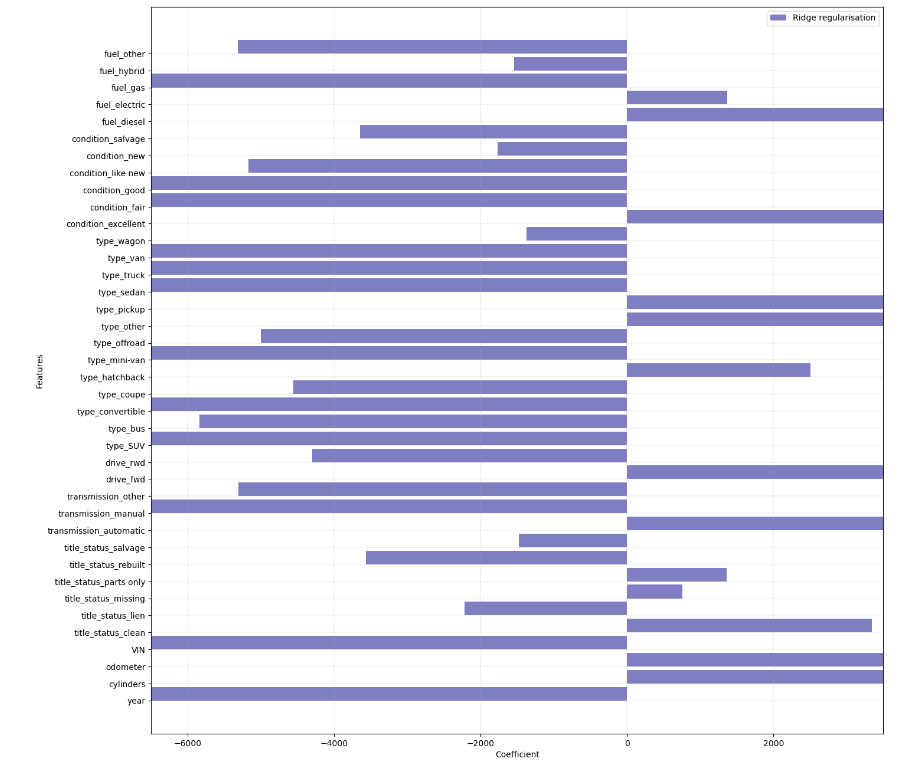
